In [2]:
import os
from pathlib import Path
from typing import Literal
from matplotlib import pyplot as plt
import polars as pl

import seaborn as sns

# current directory をリポジトリルートに固定
os.chdir("/Users/masato.morita/src/recommender-experiments/")

# グラフに日本語を表示するために、日本語対応のフォントを設定 (例: IPAexゴシック)
plt.rcParams["font.family"] = "IPAexGothic"
print(plt.rcParams["font.family"])
import japanize_matplotlib

['IPAexGothic']


In [3]:
# 結果ファイルのパス
RESULTS_DIR = Path("logs/two_tower_model_experiment")
# RANDOM_ROGGING_POLICY_RESULTS = RESULTS_DIR / "random_logging_policy_results.csv"
RANDOM_ROGGING_POLICY_RESULTS = RESULTS_DIR / "random_logging_policy_results_batch10.csv"
PERSONALIZED_POLICY_RESULTS = RESULTS_DIR / "personalized_logging_policy_results_batch10.csv"
N_ACTIONS_RESULTS = RESULTS_DIR / "n_actions_results_batch10.csv"
BATCH_SIZE_RESULTS = RESULTS_DIR / "batch_size_results.csv"

# グラフ描画のための設定
OPL_METHOD_NAMES = {
    "dr": "勾配ベース(DR推定量)",
    "ips": "勾配ベース(IPS推定量)",
    "regression_based": r"回帰ベース(報酬rのcross entropy loss)",
}

['simulation_idx', 'n_actions', 'dim_context', 'n_rounds_train', 'n_rounds_test', 'batch_size', 'expected_reward_lower', 'expected_reward_upper', 'expected_reward_setting', 'new_policy_setting', 'off_policy_learning_method', 'logging_policy_value', 'new_policy_value']


Text(0.5, -0.01, '図1: 一様ランダムなデータ収集方策の場合のTwo-Towerモデルによる推薦方策のオフライン学習効果\n(データ収集方策は一様ランダム, アクション数は10. バッチサイズは10で固定)')

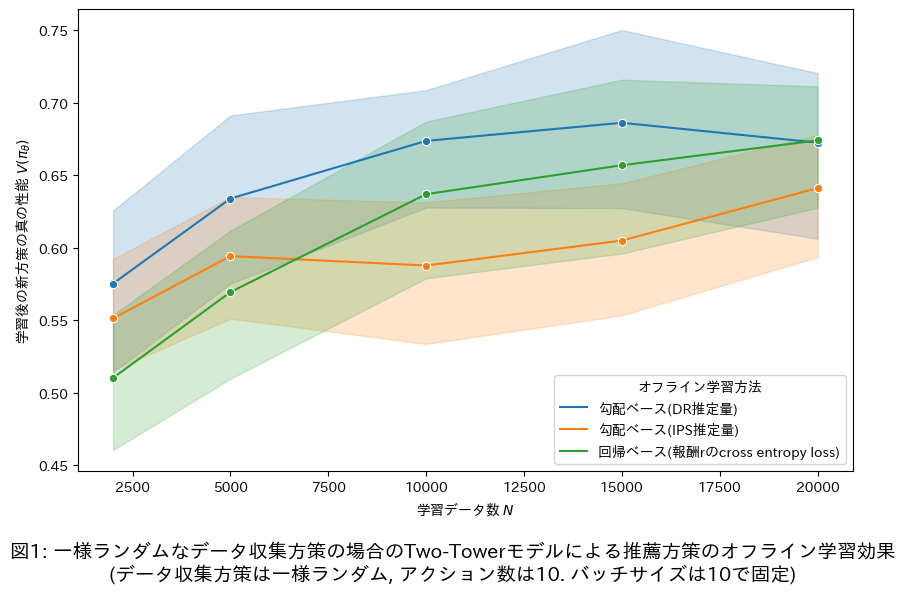

In [8]:
result_df = pl.read_csv(RANDOM_ROGGING_POLICY_RESULTS)
print(result_df.columns)
result_df

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=result_df.to_pandas(),
    x="n_rounds_train",
    y="new_policy_value",
    hue="off_policy_learning_method",
    marker="o",
    # palette=COLOR_MAP,
    # 幅を表示させないようにしたい
    # ci=None,
)
ax.set_xlabel(r"学習データ数 $N$")
ax.set_ylabel(r"学習後の新方策の真の性能 $V(\pi_{\theta})$")

# 凡例の整備
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles, labels=[OPL_METHOD_NAMES[label] for label in labels], title="オフライン学習方法", loc="lower right"
)

# タイトルを下に移動して改行
plt.suptitle(
    "図1: 一様ランダムなデータ収集方策の場合のTwo-Towerモデルによる推薦方策のオフライン学習効果\n"
    r"(データ収集方策は一様ランダム, アクション数は10. バッチサイズは10で固定)",
    y=-0.01,  # 位置を調整 (負の値で下に移動)
    fontsize=14,
)

['simulation_idx', 'n_actions', 'dim_context', 'n_rounds_train', 'n_rounds_test', 'batch_size', 'expected_reward_lower', 'expected_reward_upper', 'expected_reward_setting', 'new_policy_setting', 'off_policy_learning_method', 'logging_policy_value', 'new_policy_value']


Text(0.5, -0.01, '図2: 偏った学習データの場合の、two-towerモデルによる推薦方策のオフライン学習効果\n(データ収集方策はcontext-awareな確率的方策(epsilon-greedy), アクション数は10, バッチサイズは200で固定)')

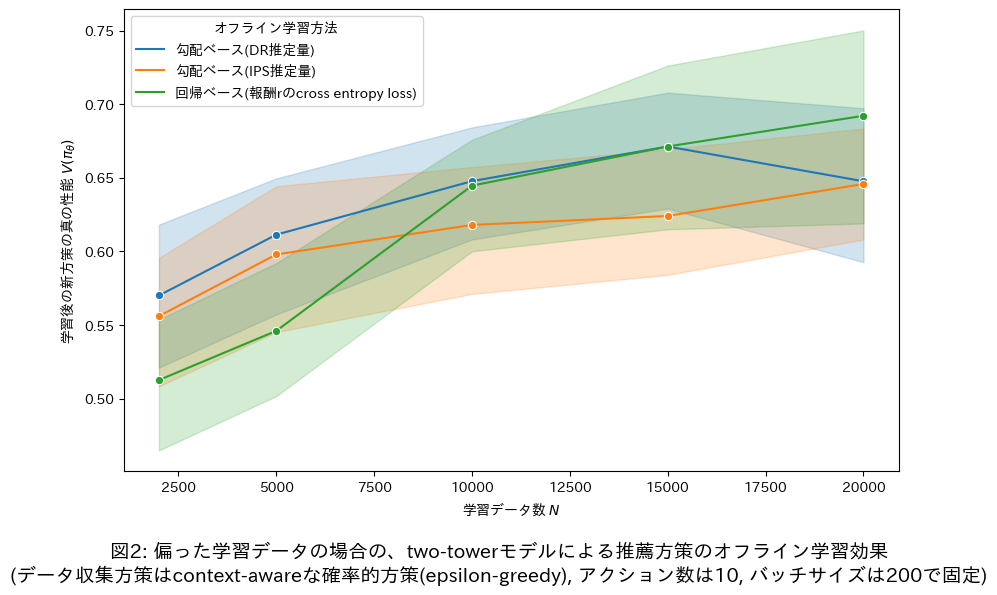

In [ ]:
result_df = pl.read_csv(PERSONALIZED_POLICY_RESULTS)
print(result_df.columns)
result_df

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=result_df.to_pandas(),
    x="n_rounds_train",
    y="new_policy_value",
    hue="off_policy_learning_method",
    marker="o",
    # palette=COLOR_MAP,
    # ci=None,
)
ax.set_xlabel(r"学習データ数 $N$")
ax.set_ylabel(r"学習後の新方策の真の性能 $V(\pi_{\theta})$")

# 凡例の整備
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles, labels=[OPL_METHOD_NAMES[label] for label in labels], title="オフライン学習方法", loc="upper left"
)

# タイトルを下に移動して改行
plt.suptitle(
    "図2: 偏った学習データの場合の、two-towerモデルによる推薦方策のオフライン学習効果\n"
    r"(データ収集方策はcontext-awareな確率的方策(epsilon-greedy), アクション数は10, バッチサイズは10で固定)",
    y=-0.01,  # 位置を調整 (負の値で下に移動)
    fontsize=14,
)

['simulation_idx', 'n_actions', 'dim_context', 'n_rounds_train', 'n_rounds_test', 'batch_size', 'expected_reward_lower', 'expected_reward_upper', 'expected_reward_setting', 'new_policy_setting', 'off_policy_learning_method', 'logging_policy_value', 'new_policy_value']


Text(0.5, -0.01, '図3: アクション数(推薦候補数)ごとのtwo-towerモデルによる推薦方策のオフライン学習効果\n(データ収集方策はcontext-awareな確率的方策(epsilon-greedy), 学習データ数は15000, バッチサイズは200で固定)')

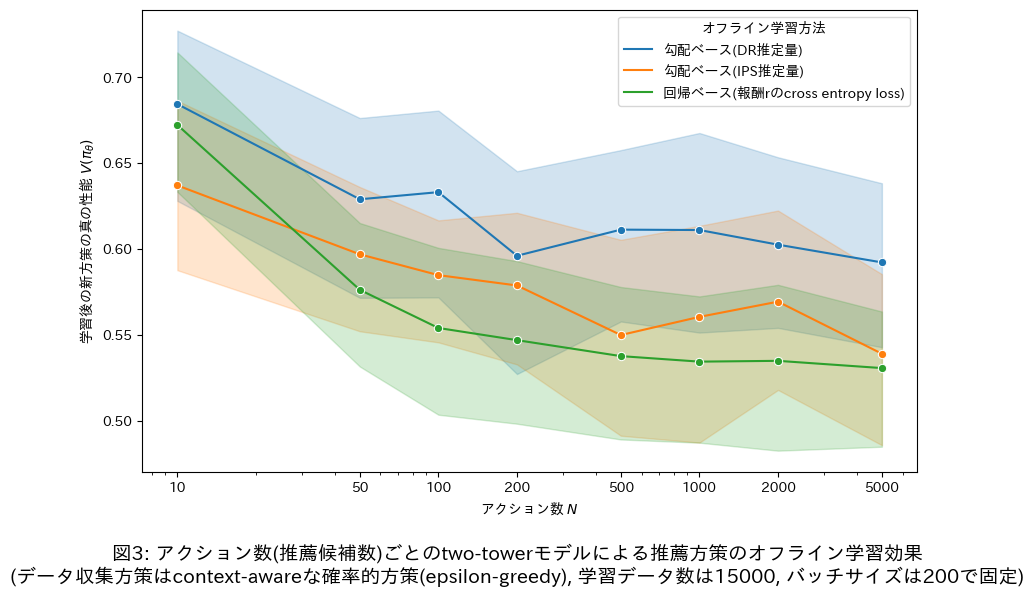

In [81]:
result_df = pl.read_csv(N_ACTIONS_RESULTS)
print(result_df.columns)
result_df

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=result_df.to_pandas(),
    x="n_actions",
    y="new_policy_value",
    hue="off_policy_learning_method",
    marker="o",
    # palette=COLOR_MAP,
)
ax.set_xlabel(r"アクション数 $N$")
ax.set_xscale("log")  # 追加: x軸を対数スケールにする
ax.set_xticks([10, 50, 100, 200, 500, 1000, 2000, 5000])  # 追加: x軸の目盛り表示を設定
ax.set_xticklabels([10, 50, 100, 200, 500, 1000, 2000, 5000])  # 追加: x軸の目盛り表示を設定
ax.set_ylabel(r"学習後の新方策の真の性能 $V(\pi_{\theta})$")
# 凡例の整備
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[OPL_METHOD_NAMES[label] for label in labels], title="オフライン学習方法")

# タイトルを下に移動して改行
plt.suptitle(
    "図3: アクション数(推薦候補数)ごとのtwo-towerモデルによる推薦方策のオフライン学習効果\n"
    r"(データ収集方策はcontext-awareな確率的方策(epsilon-greedy), 学習データ数は15000, バッチサイズは200で固定)",
    y=-0.01,  # 位置を調整 (負の値で下に移動)
    fontsize=14,
)

['simulation_idx', 'n_actions', 'dim_context', 'n_rounds_train', 'n_rounds_test', 'batch_size', 'expected_reward_lower', 'expected_reward_upper', 'expected_reward_setting', 'new_policy_setting', 'off_policy_learning_method', 'logging_policy_value', 'new_policy_value']


Text(0.5, -0.01, 'バッチサイズごとのtwo-towerモデルによる推薦方策のオフライン学習効果\n(データ収集方策はcontext-awareな確率的方策(epsilon-greedy), 学習データ数は15000, アクション数は10で固定)')

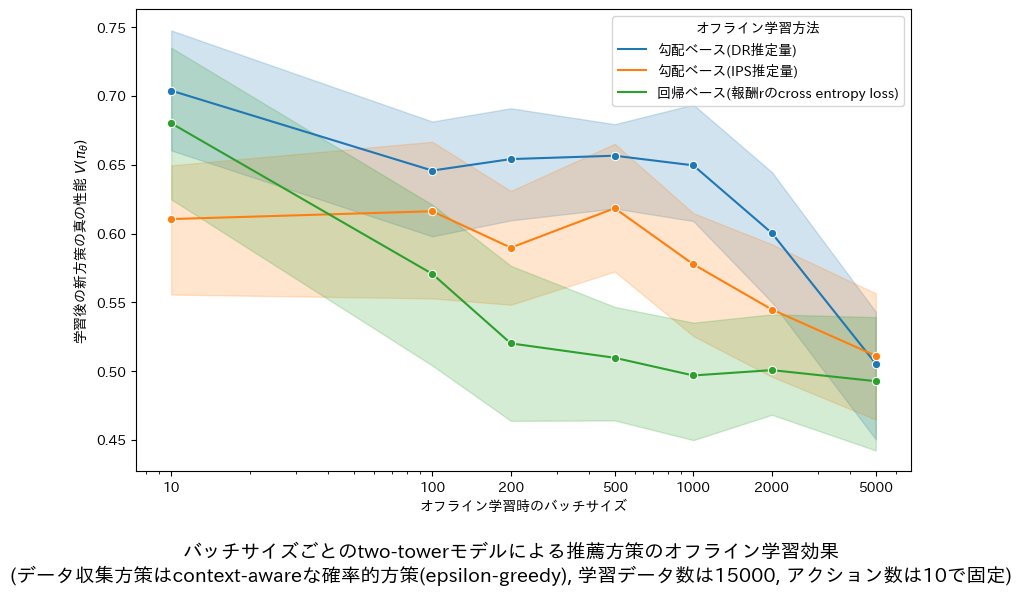

In [82]:
result_df = pl.read_csv(BATCH_SIZE_RESULTS)
print(result_df.columns)
result_df

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=result_df.to_pandas(),
    x="batch_size",
    y="new_policy_value",
    hue="off_policy_learning_method",
    marker="o",
    # palette=COLOR_MAP,
)
ax.set_xlabel(r"オフライン学習時のバッチサイズ")
ax.set_xscale("log")  # 追加: x軸を対数スケールにする
ax.set_xticks([10, 100, 200, 500, 1000, 2000, 5000])  # 追加: x軸の目盛り表示を設定
ax.set_xticklabels([10, 100, 200, 500, 1000, 2000, 5000])  # 追加: x軸の目盛り表示を設定
ax.set_ylabel(r"学習後の新方策の真の性能 $V(\pi_{\theta})$")
# 凡例の整備
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[OPL_METHOD_NAMES[label] for label in labels], title="オフライン学習方法")

# タイトルを下に移動して改行
plt.suptitle(
    "バッチサイズごとのtwo-towerモデルによる推薦方策のオフライン学習効果\n"
    r"(データ収集方策はcontext-awareな確率的方策(epsilon-greedy), 学習データ数は15000, アクション数は10で固定)",
    y=-0.01,  # 位置を調整 (負の値で下に移動)
    fontsize=14,
)